# Lab 2: Analyzing the MoMA Data






Working on this lab should be a **collaborative effort**. We encourage you to work togheter with your group. If you do not work on your own notebook, make sure you demo to the TA/instructor as a group and share your work across the group after the lab.

> Remeber, to indicate the names of your group members,if you use some of the collectivley developed code in a future homework. 

## Objectives
1. Computing Summary Statistics from Data 
2. Data Visualization using matplotlib
3. Posing and Answering a Data Problem

## Outline

1. [Recap: EDA Process](#Recap:-EDA-Process)
2. [Game Plan](#Game-Plan)
    1. [Step 1: MoMA Data](#Step-1:-MoMA-Data)
    2. [Step 2: Data Wrangling](#Step-2:-Data-Wrangling)
    3. [Step 3: Data Profiling](#Step-3:-Data-Profiling)
    4. [Step 4: Develop Questions to Investigate](#Step-4:-Develop-Questions-to-Investigate)
    5. [Step 5: Investiage Hypothesis Q1](#Step-5:-Investiage-Hypothesis-Q1)
    6. [Step 5: Investiage Hypothesis Q2](#Step-5:-Investiage-Hypothesis-Q2)
    7. [Step 6: Answer Questions](#Step-6:-Answer-Questions)

## Recap: EDA Process
Exploratory Data Analysis (EDA) is an approach to analyze and summarize data sets. 

<img src="utility/pics/EDA.png" alt="Drawing" style="width: 600px;"/>

(Business) goals require us to preform data analysis in order to answer/investigate a **data problem**. We begin with gaining a basic understanding of the data that is available. This understanding may require revisiting the (business) goals. Once an understanding is established the data needs to be prepared for modeling/analysis. This step includes some or all of the following data (pre-)processing:
* _data wrangling:_ parsing and formatting the data
* _data profiling_
* _data cleaning_
* _data engineering_ 

While creating models or analyzing the data (i.e., computing summary statistics, etc.), revisiting the data preparation phase is fairly common because of new discoveries or requirements. After the modelling phase we need to evaluate the model/findings, oftentimes using visualizations. Based on your findings you will have to revisit and possibly adapt your (business) goals and iterate over the entire EDA process again. Finally, once you have evaluated the model/data satisfactorily, it can be deployed into an internal workflow, as a report, or as an external process or product. 

## Game Plan
1. Get the data and gain **basic understanding**
2. **Wrangle** the data
3. **Profile** the data
4. Develop questions to investigate (form a **hypotheses**)
5. Use the data to **investigate** hypothesis
6. **Summarize** results and answer questions 

### Step 1: MoMA Data
In this lab we will be working with a dataset from the Museum of Modern Art in New York, also commonly referred to as  _MoMA_.  

![MoMA](utility/pics/MoMA.png)
We will be looking at  
* Artworks 
* Artists
* Directors

Our dataset represents **all** of the works that have been accessioned into MoMA’s collection and cataloged in their database. The data is publically available at https://github.com/MuseumofModernArt. 
Thanks to MoMA for releasing this dataset [http://dx.doi.org/10.5281/zenodo.1324595](http://dx.doi.org/10.5281/zenodo.1324595). Thanks to Chloe Mawer and Jonathan Whitmore to share their EDA work on this data!

#### Imports and Environment Setup
Run the following blocks of code to set up the lab environment.

In [2]:
# basic wrangling
import pandas as pd
from utility.util import clean_columns

# plotting
from matplotlib import pyplot as plt
from utility.util import plot_gender_fraction_over_time

#### Load Raw Data

Let's load the data into a **pandas data frame**. Pandas is a Pyhton library for data analysis; see https://pandas.pydata.org for more information.

Conveniently pandas comes with a routine `read_csv` to load data from csv files into data frames (panda's data structure to store tabular data). This means that we are lucky and do not have to write a parser ourselves!

**Try this!** Load the directors table `MoMADirectorsDepartmentHeads.csv`. It's stored in the same folder as the artworks table. 

In [3]:
# Load data
artworks = pd.read_csv("./utility/data/Artworks.csv")

# your code here
directors = pd.read_csv("./utility/data/MoMADirectorsDepartmentHeads.csv")

### Step 2: Data Wrangling

In [3]:
# Look at the table columns
artworks.columns

Index(['Title', 'Artist', 'ConstituentID', 'ArtistBio', 'Nationality',
       'BeginDate', 'EndDate', 'Gender', 'Date', 'Medium', 'Dimensions',
       'CreditLine', 'AccessionNumber', 'Classification', 'Department',
       'DateAcquired', 'Cataloged', 'ObjectID', 'URL', 'ThumbnailURL',
       'Circumference (cm)', 'Depth (cm)', 'Diameter (cm)', 'Height (cm)',
       'Length (cm)', 'Weight (kg)', 'Width (cm)', 'Seat Height (cm)',
       'Duration (sec.)'],
      dtype='object')

In [7]:
# Format the column names (this function is hidden in utility/util.py as it is not that important)
artworks = clean_columns(artworks)
directors = clean_columns(directors)


                                                    Title  \
0       Ferdinandsbrücke Project, Vienna, Austria, Ele...   
1       City of Music, National Superior Conservatory ...   
2       Villa near Vienna Project, Outside Vienna, Aus...   
3       The Manhattan Transcripts Project, New York, N...   
4       Villa, project, outside Vienna, Austria, Exter...   
...                                                   ...   
135313                            Lost Portraits (Double)   
135314  Lost Portraits (Group) and Ula, Charlie and Fr...   
135315                                              Hilde   
135316                                              Bärbl   
135317                                              Alice   

                          Artist ConstituentID  \
0                    Otto Wagner          6210   
1       Christian de Portzamparc          7470   
2                     Emil Hoppe          7605   
3                Bernard Tschumi          7056   
4                

**Try this!** Look at the columns of both tables again to observe the changes. Simply run the cell block that looks at table columns again.

Let's look at some entries in the artworks dataframe. Note that a `DataFrame` is a generalized **numpy array**, so a lot of the things you learned about arrays apply to dataframes as well. 

By using our knowledge about the history of the MoMA, let's look at works acquired in the _first year_ of its opening (1929).

In [8]:
# Set pandas options to display all rows and columns [Be careful if displaying huge dataframes!]
pd.options.display.max_columns = None
pd.options.display.max_rows = None

artworks[artworks['DateAcquired'] < '1930-01-01']

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,Dimensions,CreditLine,AccessionNumber,Classification,Department,DateAcquired,Cataloged,ObjectID,URL,ThumbnailURL,Circumference_cm,Depth_cm,Diameter_cm,Height_cm,Length_cm,Weight_kg,Width_cm,Seat_Height_cm,Duration_sec
31567,Anna Peter,George Grosz,2374,"(American, born Germany. 1893–1959)",(American),(1893),(1959),(Male),(1926-27),Pencil on paper,"27 x 21 1/8"" (68.6 x 53.7 cm)",Gift of Paul J. Sachs,4.1929,Drawing,Drawings,1929-11-19,Y,32996,http://www.moma.org/collection/works/32996,http://www.moma.org/media/W1siZiIsIjg1OTk2Il0s...,NaN,NaN,NaN,68.580100,NaN,NaN,53.6576,NaN,NaN
55945,Self-Portrait (Selbstbildnis),Max Beckmann,429,"(German, 1884–1950)",(German),(1884),(1950),(Male),"1914, published 1918",Drypoint,"plate: 9 1/8 x 6 15/16"" (23.2 x 17.7 cm); shee...",Gift of Paul J. Sachs,1.1929,Print,Prints & Illustrated Books,1929-11-19,Y,59533,http://www.moma.org/collection/works/59533,http://www.moma.org/media/W1siZiIsIjE2NjE4MSJd...,NaN,NaN,NaN,238.760478,NaN,NaN,17.7000,NaN,NaN
55997,Before the Mirror (Vor dem Spiegel),Max Beckmann,429,"(German, 1884–1950)",(German),(1884),(1950),(Male),(1923),Drypoint,"plate: 8 15/16 x 6 7/8"" (22.7 x 17.4 cm); shee...",Gift of Paul J. Sachs,2.1929,Print,Prints & Illustrated Books,1929-11-19,Y,59585,http://www.moma.org/collection/works/59585,http://www.moma.org/media/W1siZiIsIjExNDY5NSJd...,NaN,NaN,NaN,22.700000,NaN,NaN,17.4000,NaN,NaN
56009,The Blessing of Heaven is Visibly upon Me (Got...,George Grosz,2374,"(American, born Germany. 1893–1959)",(American),(1893),(1959),(Male),(1922),Photolithograph,"composition (irreg.): 17 13/16 x 14 7/16"" (45....",Gift of Paul J. Sachs,3.1929,Print,Prints & Illustrated Books,1929-11-19,Y,59600,http://www.moma.org/collection/works/59600,http://www.moma.org/media/W1siZiIsIjEzNDg3MyJd...,NaN,NaN,NaN,45.300000,NaN,NaN,36.7000,NaN,NaN
56050,Marine,Lyonel Feininger,1832,"(American, 1871–1956)",(American),(1871),(1956),(Male),1918,Woodcut,"composition (irreg.): 6 5/8 x 8 7/8"" (16.8 x 2...",Gift of Paul J. Sachs,5.1929,Print,Prints & Illustrated Books,1929-11-19,Y,59646,http://www.moma.org/collection/works/59646,http://www.moma.org/media/W1siZiIsIjExNDcxOSJd...,NaN,NaN,NaN,16.800000,NaN,NaN,22.5000,NaN,NaN
56075,"Woman, Standing in the Garden (Frau, im Garten...",Oskar Kokoschka,3197,"(Austrian, 1886–1980)",(Austrian),(1886),(1980),(Male),(1916),Lithograph,"composition (irreg.): 9 13/16 x 5 11/16"" (24.9...",Gift of Paul J. Sachs,6.1929,Print,Prints & Illustrated Books,1929-11-19,Y,59673,http://www.moma.org/collection/works/59673,http://www.moma.org/media/W1siZiIsIjEyMjU0OCJd...,NaN,NaN,NaN,24.900000,NaN,NaN,14.5000,NaN,NaN
56109,Max Reinhardt (Head) (Kopf),Oskar Kokoschka,3197,"(Austrian, 1886–1980)",(Austrian),(1886),(1980),(Male),(1919),Lithograph,"composition (irreg. ): 15 3/16 x 11 15/16"" (38...",Gift of Paul J. Sachs,7.1929,Print,Prints & Illustrated Books,1929-11-19,Y,59708,http://www.moma.org/collection/works/59708,http://www.moma.org/media/W1siZiIsIjExOTMxOCJd...,NaN,NaN,NaN,38.600000,NaN,NaN,30.3000,NaN,NaN
56126,Dialogue (Zwiesprache),Max Pechstein,4533,"(German, 1881–1955)",(German),(1881),(1955),(Male),1920,Woodcut,"composition: 15 13/16 x 12 9/16"" (40.2 x 31.9 ...",Gift of Paul J. Sachs,8.1929,Print,Prints & Illustrated Books,1929-11-19,Y,59728,http://www.moma.org/collection/works/59728,http://www.moma.org/media/W1siZiIsIjExNDgzMCJd...,NaN,NaN,NaN,40.200000,NaN,NaN,31.9000,NaN,NaN
56159,The Lords of the World (Die Herren der Welt ),Georg Scholz,5260,"(German, 1890–1945)",(German),(1890),(1945),(Male),(1922),Lithograph,"composition: 11 3/4 x 15 3/4"" (29.8 x 40 cm); ...",Gift of Paul J. Sachs,9.1929,Print,Prints & Illustrated Books,1929-11-19,Y,59762,http://www.moma.org/collection/works/59762,http://www.moma.org/media/W1siZiIsIjEyMjcyMCJd...,NaN,NaN,NaN,29.845100,NaN,NaN,40.0000,NaN,NaN
129764,Songs for Swinging Larvae,Residents,34673,"(USA, est. 1972)",(Ame

> Note: In pandas you can also do `artworks.DateAcquired` which is equivalent to `artworks['DateAcquired']`

**Write-up!** Look closely at the data. Can you notice some interesting aspect in this sample of the data you would like to investigate further? Make a note in the cell below. 

Did you already notice a flaw in this extremely small sample? ...yes! Data is _always_ messy.

#### Data Cleaning and Formatting

In [6]:
# Exclude (or fix) troublesome data as you discover it
artworks.loc[artworks[artworks.DateAcquired=='1216-10-18'].index, 'DateAcquired'] = '2016-10-18'

In [7]:
# Set the date to a datetime type
artworks['DateAcquired'] = pd.to_datetime(artworks['DateAcquired'])

### Step 3: Data Profiling

**Try this!** How many artworks does our dataset have? How many _features_? Get the number of artworks and number of features of the dataset. Luckily, you can use the same command as for numpy arrays! Feel free to get an idea of what the other dataset (directors) looks like as well. 

In [8]:
# your code here
artworks.size

3924222

#### Summary Statistics and Visualization
Let's compute some basic summary statistics and visualize the distributions of some of the features. The first feature to investigate could be the width of the artworks. 

##### Width in cm
> Note: this is a _continuous_ variable. 

mean: 38.02759300863654
standard deviation: 66.68162504161408
min: 0.0
max: 9144.0


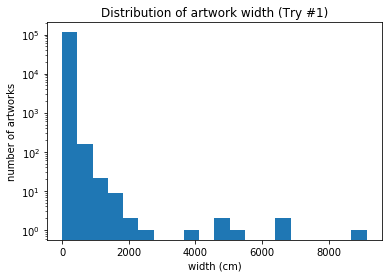

In [9]:
# Summary statistics
print(f'mean: {artworks["Width_cm"].mean()}')
print(f'standard deviation: {artworks["Width_cm"].std()}')
print(f'min: {artworks["Width_cm"].min()}')
print(f'max: {artworks["Width_cm"].max()}')

# Extract the width column
w = artworks['Width_cm']

# Do not consider examples where the value = NaN
id_NaN = artworks['Width_cm'].notnull()
w = w[id_NaN]

# Plot histogram
#plt.hist(w, 20)
plt.hist(w, 20, log=True)
plt.title("Distribution of artwork width (Try #1)")
plt.xlabel("width (cm)")
plt.ylabel("number of artworks")
plt.show()

Well, this didn't work out as expected. 

**Try this!** In the above cell, play with the number of bins for the histogram plot. 

It turns out the issue we face is that the **range** of the width variable (as displayed on the x-axis in the histogram plot) is quite large. So, we don't really see anything. 

**Try this!** Create a temporary variable `w_new` of the width of all artworks with width smaller then 250cm. Also, a width of 0 doesn't really make much sense either! Plot the histogram and compute the summary statistics from this new variable, including mean, standard deviation, and anything else you may think is useful to know. Remember to include plot titles and axis labels!

##### Classification
Our next feature to investiage is the classification of the artwork. 
> Note: this is a _categorical_ variable.

Most fequent class and ferequency:
Photograph    31353
Name: Classification, dtype: int64


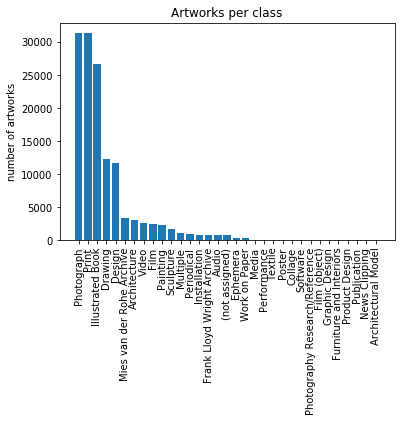

In [10]:
# Aggregated vaules
#print(artworks.Classification.value_counts())

# Summary statisitcs
class_mode = artworks['Classification'].mode().values
print("Most fequent class and ferequency:")
print(artworks.Classification.value_counts()[class_mode])

# Bar plot
plt.bar(artworks['Classification'].value_counts().keys(),artworks['Classification'].value_counts().values)
plt.xticks(rotation=90)
plt.title("Artworks per class")
plt.ylabel("number of artworks")
plt.show()

# [OPTIONAL] the same plot can be generated using pandas plot functinality
# artworks['Classification'].value_counts().plot(kind='bar')

##### Your Feature
**Try this!** Compute the summary statistics of another feature of your choice and visualize it using an appropriate plot.

Most fequent class and ferequency:
Prints & Illustrated Books    62013
Name: Department, dtype: int64


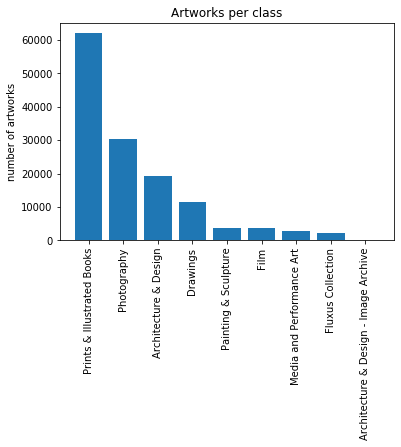

In [11]:
# your code here
# Summary statisitcs
class_mode = artworks['Department'].mode().values
print("Most fequent class and ferequency:")
print(artworks.Department.value_counts()[class_mode])

# Bar plot
plt.bar(artworks['Department'].value_counts().keys(),artworks['Department'].value_counts().values)
plt.xticks(rotation=90)
plt.title("Artworks per class")
plt.ylabel("number of artworks")
plt.show()

##### Relationship between two variables

**Challenge!** Visualize the relationship between two _continuous_ variables of your choice using an appropriate plot. Check Lab1 for some sample code if you need a reminder. 

In [12]:
# your code here


### Step 4: Develop Questions to Investigate
Hold on! We don't really know (yet) what we are trying to investiage in the MoMA data! By looking at the artworks acquired in 1929 you might have noticed that all artworks are from male artistis. That's something to take a closer look at! So, here is an interesting question of investigation: 


> _What has impacted the representation of gender in the Museum of Modern Art?_

Now, this is an extremely broad question. Let's break this down into a bunch of smaller questions, for example: 

- **(Q1)** _How does the gender distribution of acquired works change over time?_
- **(Q2)** _How does the gender distribution of acquired works change with different museum directors?_

**Write-up!** Is there anything else that comes to your mind right now, that you want to investiagte? If so, make a note in the cell below: 

#### More Data Profiling and Cleaning
Okay, so let's look at some basic aggregate statistics with respect to artworks and artist gender. How many artworks from male and female artists did the MoMA acquire? 

Try #1: let's use panda's `groupby` function: 

In [ ]:
artworks.groupby('Gender').count()

**Oooooops** It looks like this data is even messier than expected! We will have to do _some_ work to get even this simple statistic. The main issue is that an artwork can have multiple artists. So, let's count the number of female and male artists for each artwork. 

In [ ]:
# clean gender features to be all lowercase
artworks['Gender'] = artworks.Gender.str.lower()

artworks["num_males"] = artworks.Gender.apply(lambda x: str(x).count("(male)"))
artworks["num_females"] = artworks.Gender.apply(lambda x: str(x).count("(female)"))

Try #2: Observe the gender column and also the newly added last two columns aggregting the number of male and female artisits of each artwork respectively. Let' look at the most recently acquired artworks. 

**Try this!** Display all artworks acquired after May 20th 2018 and inspect the columns `DateAcquired`, `Gender`, `num_males`, and 	`num_females`. 

In [ ]:
# your code here
artworks[artworks["DateAcquired"] > ]

### Step 5: Investiage Hypothesis Q1

#### Gender Representation: Number of MoMA Artworks by Gender

In [ ]:
# works by male artist(s)
works_man = artworks[(artworks.num_males>0) & (artworks.num_females==0)]
print(f'Number of artworks by male artists: {works_man["Gender"].count()}')

**Try This!** Compute the number of artworks from female artists (_one ore mutliple female artisits, no male artists_) and the number of artworks that have both male and female artists (_at least one male and one female artist_). 

In [ ]:
# your code here


#### Trend Analysis: Visualization of Gender Representation over Time

Now, let's plot the number of MoMA artworks over time using a line plot:  

In [ ]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


def plot_num_artwork_over_time(df, title=None):
    """Calculates cumulative number of artworks. Plots the values over time."""
    
    # Drop entries where date is not defined
    df = df[df['DateAcquired'].notnull()]
    
    # Sort by date
    df = df.sort_values(by='DateAcquired')
    
    # Add artworks acquired
    df['ones'] = 1
    df['num_acquired'] = df.ones.cumsum()
    
    # Plot (this is a line plot)
    plt.plot(df.DateAcquired,df['num_acquired']/1000, label='Total')
   
    plt.xlabel("Year Acquired")
    plt.ylabel("Number of Works (000s)")
    if title:
        plt.title(title)
    plt.legend()
    plt.show()

plot_num_artwork_over_time(artworks, title="All MoMA artwork")

Great. Now, we can add the cumulative number of artworks by gender to this plot.  

In [ ]:
def plot_gender_breakdown_over_time(df, title=None):
    """Calculates cumulative number of artworks by gender. Plots the values over time."""
    
    # Drop entries where date is not defined
    df = df[df['DateAcquired'].notnull()]
    
    # Sort by date
    df = df.sort_values(by='DateAcquired')
    
    # Add artworks acquired
    df['ones'] = 1
    df['num_acquired'] = df.ones.cumsum()
    
    works_man = df[(df.num_males>0) & (df.num_females==0)].copy()   # works by male artist(s)
    works_man['num_acquired'] = works_man.ones.cumsum()
    
    # your code here

    
    # Plot
    plt.plot(df.DateAcquired,df['num_acquired']/1000, label='Total')
    plt.plot(works_man.DateAcquired,works_man['num_acquired']/1000, label='Male')
    
    # your code here

    
    plt.xlabel("Year Acquired")
    plt.ylabel("Number of Works (000s)")
    if title:
        plt.title(title)
    plt.legend()
    plt.show()
    
plot_gender_breakdown_over_time(artworks, title="All MoMA artwork By Artist Gender")

**Try This!** In the function `plot_gender_breakdown_over_time` add two more lines to the plot, one for artworks from female artists (_one ore mutliple female artisits, no male artists_) and one for artworks from both male and female artists (_at least one male and one female artist_). 

> Hint: This is very similar to when you computed the counts. Be lazy and copy your code from above!

#### Fraction Analysis: Visualization of Fraction of MoMA Artworks By Female Artists per Year

Sometimes it's a good idea to look at fractions insted of absolute numbers to account for times where more or less artworks were acquired.  

In [ ]:
artworks["frac_males"] = artworks.num_males.divide(artworks.num_males + artworks.num_females)
artworks["frac_females"] = artworks.num_females.divide(artworks.num_males + artworks.num_females)

# Verify that our fractions are correct 
# --> execute this cell a couple of times
# --> you want to see a sample artwork with artists of both genders and check the fractions
artworks.sample(15)[['DateAcquired','Gender', 'num_males', 'num_females', 'frac_males', 'frac_females']]

Now, let's take a look at the gender fractions of art aquisitions by year:

In [ ]:
# this function generating the plot is totally OPTIONAL -  no need to look at the code
plot_gender_fraction_over_time(artworks, title="All artwork")

Great! This is a pretty informative visualizations. 

#### Summarizing Results (Q1)


**Write-up!** Describe the results from the **trend** and **fraction** analysis including anything you find notable or surprising. Keep a note on any further questions you might have. 

### Step 5: Investiage Hypothesis Q2

#### Gender Representation By Director

First, we'll have to do some data cleaning on the directors table. 

In [ ]:
# Extract MoMA directors
moma_directors = directors[directors.DepartmentFullName=='The Museum of Modern Art']

In [ ]:
# Add director ID of director acquiring the work to artworks table
def get_director(year):
    """Given the year of artwork acquisition provide the director ID."""
    for director_ID in moma_directors.index:
        if year < moma_directors.sort_values(
                by="PositionBeginYear").loc[director_ID, "PositionEndYear"]:
            return director_ID
    return director_ID

try:
    artworks = pd.read_csv("./utility/data/artworks_with_director.csv", )
    artworks['DateAcquired'] = pd.to_datetime(artworks['DateAcquired'])
    print("Loaded precomputed data.")
except:
    print("This will take a couple of minutes.")
    artworks["Director_ID"] = artworks.DateAcquired.apply(lambda x: get_director(x.year))
    artworks.to_csv("./utility/data/artworks_with_director.csv", index=False)
    artworks['DateAcquired'] = pd.to_datetime(artworks['DateAcquired'])
    print("Completed cell block")

Now, let's compute the number of artworks acquired by each MoMA director and the length of each director's appointment. Based on these numbres we can then get the fractions of artworks from female artists per year. 

In [ ]:
import warnings
warnings.filterwarnings('ignore')

frac_female_by_dir = artworks.groupby("Director_ID").frac_females.mean()
frac_female_by_dir = pd.DataFrame(frac_female_by_dir)
frac_female_by_dir.columns = ["Mean fraction of works acquired by female artist"]

moma_directors["frac_female"] = frac_female_by_dir.loc[moma_directors.index, "Mean fraction of works acquired by female artist"]
moma_directors[["DisplayName","frac_female"]]

**Try this!** Create a bar plot of MoMA directors versus the fraction of acquired artworks by female artists. 

> Hint: check the example visualizing a categorical feature we provided in Step 3: Data Profiling.

In [ ]:
# your code here


#### Summarize Results (Q2)

**Write-up!** Summarize your results on the gender representation by differnt museum directors. Highlight, anything you find notable or surprising and keep a note on any further questions you might have. 

### Step 6: Answer Questions

We will show you a couple of cool insights and try to answer some of your unsanswered quesions at the beginning of next lecture. 

**Challenge!** Feel free to play with the data and investigate anything you noted or found surprising further as an optional excercise!

In [ ]:
# BEGIN SOLUTION



# END SOLUTON

## Some Takeaways: 

- Data Science is not _only_ about answering questions, but also about **posing questions**. 
- Posing questions is harder than you would expect. 
- Answering questions can often be as tricky as coming up with the question.
- Intricacies in how the data is collected or generated can impact how you can answer the question.
- Aim to remain assumption free throughout your analysis!